# Lab 03. Weather Predict Competition

This lab consists of only one task: train a model to predict if it is going to rain the next day:
- Classification metric is **roc-auc**
- Score should be calculated on a hold-out set (don't use it for training)


#### Evaluation
- Score > 0.860 - 3 points
- Score > 0.865 - 5 points
- Score > 0.870 - 7 points
- Score > 0.875 - 9 points
- Score > 0.880 - 11 points
- Score > 0.885 - 13 points
- Score > 0.890 - 15 points
- You are encouraged to use various methods and tricks to get extra points

#### Do not use any external data or models that were not covered in the course (no gradient boosting and  neural nets).


#### How to submit
- Name your file according to this convention: `2022_lab03_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab03_404_Sheipak_Sviat.ipynb`
    - `2022_lab03_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab02_GroupNumber_Surname_Name`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 22022-11-03 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://github.com/cosmic-research-ml-edu/intro_ml_2022/blob/main/homeworks/hw03/train.csv

In [102]:
import warnings

In [103]:
import pandas as pd
import numpy as np

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [105]:
db_train = pd.read_csv("train.csv")
db_test = pd.read_csv("test.csv")
data=pd.read_csv("train.csv")

In [106]:
db_train.replace({'Yes':1, 'No':0}, inplace=True)

In [107]:
#display(db_train)

In [108]:
db_train.isnull().sum()

row_id               0
mintemp            320
maxtemp            163
rainfall           768
evaporation      30585
sunshine         35487
windgustdir       4086
windgustspeed     4081
winddir9am        5568
winddir3pm        1912
windspeed9am       812
windspeed3pm      1260
humidity9am        910
humidity3pm       1231
pressure9am       6806
pressure3pm       6785
cloud9am         26929
cloud3pm         27772
temp9am            536
temp3pm            910
raintoday          768
raintomorrow         0
dtype: int64

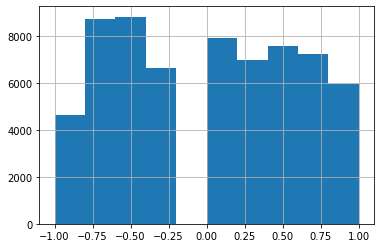

In [109]:
mwe=db_train['windgustdir'].copy();
msn=db_train['windgustdir'].copy();
#msn.hist()
mwe.replace({'W':1, 'E':-1,'WNW':0.75,'NNW':0.25,'N':0,'NNE':-0.25,'SW':0.5,'ENE':-0.75,'SSE':-0.25,'NE':-0.5,'WSW':0.75, 'WNW':0.75,'S':0,'ESE':-0.75,'NW':0.5,'E':-1,'SSW':0.25,'SE':-0.5}, inplace=True)
msn.replace({'W':0, 'E':0,'WNW':0.25,'NNW':0.75,'N':1,'NNE':0.75,'SW':-0.5,'ENE':0.25,'SSE':-0.75,'NE':0.5,'WSW':-0.25, 'WNW':0.25,'S':-1,'ESE':-0.25,'NW':0.5,'E':0,'SSW':-0.75,'SE':-0.5}, inplace=True)
#msn.hist()
db_train['windgustdirwe']=pd.Series(mwe)
db_train['windgustdirsn']=pd.Series(msn)

mwe=db_train['winddir9am'].copy();
msn=db_train['winddir9am'].copy();
#msn.hist()
mwe.replace({'W':1, 'E':-1,'WNW':0.75,'NNW':0.25,'N':0,'NNE':-0.25,'SW':0.5,'ENE':-0.75,'SSE':-0.25,'NE':-0.5,'WSW':0.75, 'WNW':0.75,'S':0,'ESE':-0.75,'NW':0.5,'E':-1,'SSW':0.25,'SE':-0.5}, inplace=True)
msn.replace({'W':0, 'E':0,'WNW':0.25,'NNW':0.75,'N':1,'NNE':0.75,'SW':-0.5,'ENE':0.25,'SSE':-0.75,'NE':0.5,'WSW':-0.25, 'WNW':0.25,'S':-1,'ESE':-0.25,'NW':0.5,'E':0,'SSW':-0.75,'SE':-0.5}, inplace=True)
msn.hist()
db_train['winddir9amwe']=pd.Series(mwe)
db_train['winddir9amsn']=pd.Series(msn)


mwe=db_train['winddir3pm'].copy();
msn=db_train['winddir3pm'].copy();
#msn.hist()
mwe.replace({'W':1, 'E':-1,'WNW':0.75,'NNW':0.25,'N':0,'NNE':-0.25,'SW':0.5,'ENE':-0.75,'SSE':-0.25,'NE':-0.5,'WSW':0.75, 'WNW':0.75,'S':0,'ESE':-0.75,'NW':0.5,'E':-1,'SSW':0.25,'SE':-0.5}, inplace=True)
msn.replace({'W':0, 'E':0,'WNW':0.25,'NNW':0.75,'N':1,'NNE':0.75,'SW':-0.5,'ENE':0.25,'SSE':-0.75,'NE':0.5,'WSW':-0.25, 'WNW':0.25,'S':-1,'ESE':-0.25,'NW':0.5,'E':0,'SSW':-0.75,'SE':-0.5}, inplace=True)
#msn.hist()
db_train['winddir3pmwe']=pd.Series(mwe)
db_train['winddir3pmsn']=pd.Series(msn)

db_train=db_train.drop(columns=['winddir3pm','winddir9am','windgustdir'])


In [110]:
#display(db_train)

In [111]:
#db_train.describe().T

In [112]:
#db_train.isnull().sum()

In [113]:
print(db_train['rainfall'][1])

0.0


In [114]:
lasttable=db_train
temp1=lasttable['mintemp'].mean()
temp2=lasttable['maxtemp'].mean()
temp3=lasttable['temp9am'].mean()
temp4=lasttable['temp3pm'].mean()
print(temp1,temp2,temp3,temp4)
k1=temp1/temp3
k2=temp2/temp4
rf=lasttable["rainfall"].mean()
wgsn=lasttable['windgustdirsn'].mean()
wgwe=lasttable['windgustdirwe'].mean()
wg9we=lasttable['winddir9amwe'].mean()
wg9sn=lasttable['winddir9amsn'].mean()
wg3we=lasttable['winddir3pmwe'].mean()
wg3sn=lasttable['winddir3pmsn'].mean()

#?????

rt=lasttable['raintoday'].mean()

for x in range(70000):
  if(pd.isna(np.array(lasttable['raintoday'])[x])):
    lasttable['raintoday'][x]=rt
  
  if(   pd.isna(np.array(lasttable['windgustdirsn'])[x])  ):
    lasttable['windgustdirsn'][x]=wgsn
  if(   pd.isna(np.array(lasttable['windgustdirwe'])[x])  ):
    lasttable['windgustdirwe'][x]=wgwe
  if(   pd.isna(np.array(lasttable['winddir9amwe'])[x])  ):
    lasttable['winddir9amwe'][x]=wg9we
  if(   pd.isna(np.array(lasttable['winddir9amsn'])[x])  ):
    lasttable['winddir9amsn'][x]=wg9sn
  if(   pd.isna(np.array(lasttable['winddir3pmwe'])[x])  ):
    lasttable['winddir3pmwe'][x]=wg3we
  if(   pd.isna(np.array(lasttable['winddir3pmsn'])[x])  ):
    lasttable['winddir3pmsn'][x]=wg3sn



  if(   pd.isna(np.array(lasttable['mintemp'])[x])  ):
    if(   pd.isna(np.array(lasttable['temp9am'])[x])  ):
      lasttable['mintemp'][x]=temp1
      lasttable['temp9am'][x]=temp3
    else:
      lasttable['mintemp'][x]=lasttable['temp9am'][x]*k1

  if(   pd.isna(np.array(lasttable['temp9am'])[x])  ):
    lasttable['temp9am'][x]=lasttable['mintemp'][x]/k1

  if(   pd.isna(np.array(lasttable['maxtemp'])[x])  ):
    if(   pd.isna(np.array(lasttable['temp3pm'])[x])  ):
      lasttable['maxtemp'][x]=temp2
      lasttable['temp3pm'][x]=temp4
    else:
      lasttable['maxtemp'][x]=lasttable['temp3pm'][x]*k2

  if(   pd.isna(np.array(lasttable['temp3pm'])[x])  ):
    lasttable['temp3pm'][x]=lasttable['maxtemp'][x]/k2
 

  if(pd.isna(np.array(lasttable['rainfall'])[x])):
     if(lasttable['raintoday'][x]<1):#&&&&&&&&&&&&&&
       lasttable['rainfall'][x]=0.0
     if(lasttable['raintoday'][x]==1):
       lasttable['rainfall'][x]=rf

db_train=lasttable

11.989862227324915 22.67353838223291 16.53805136473569 21.185604284266898


<ipython-input-114-0cdd2794446c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasttable['raintoday'][x]=rt
<ipython-input-114-0cdd2794446c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasttable['winddir9amwe'][x]=wg9we
<ipython-input-114-0cdd2794446c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasttable['winddir9amsn'][x]=wg9sn
<ipython-input-114-0cdd2794446c>:63: SettingWithCopyWarning: 
A value is trying to be set o

In [115]:
db_train2=db_train[db_train['raintoday']<1]
db_train3=db_train[db_train['raintoday']==1]
e1=db_train2["evaporation"].mean()
e2=db_train3["evaporation"].mean()
s1=db_train2["sunshine"].mean()
s2=db_train3["sunshine"].mean()
#e1=9999
#e2=9999
#s1=9999
#s2=9999
h91=db_train2["humidity9am"].mean()
h92=db_train3["humidity9am"].mean()
h31=db_train2["humidity3pm"].mean()
h32=db_train3["humidity3pm"].mean()

c91=db_train2["cloud9am"].mean()
c92=db_train3["cloud9am"].mean()
c31=db_train2["cloud3pm"].mean()
c32=db_train3["cloud3pm"].mean()

p31=db_train2["pressure3pm"].mean()
p32=db_train3["pressure3pm"].mean()
p91=db_train2["pressure9am"].mean()
p92=db_train3["pressure9am"].mean()

ws31=db_train2["windspeed3pm"].mean()
ws32=db_train3["windspeed3pm"].mean()
ws91=db_train2["windspeed9am"].mean()
ws92=db_train3["windspeed9am"].mean()

ws=db_train3["windgustspeed"].mean()
for x in range(70000):
  if(   pd.isna(np.array(db_train['evaporation'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['evaporation'][x]=e1
    if(db_train['raintoday'][x]==1 ):
      db_train['evaporation'][x]=e2
  if(   pd.isna(np.array(db_train['sunshine'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['sunshine'][x]=s1
    if(db_train['raintoday'][x]==1 ):
      db_train['sunshine'][x]=s2
  if(   pd.isna(np.array(db_train['humidity9am'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['humidity9am'][x]=h91
    if(db_train['raintoday'][x]==1 ):
      db_train['humidity9am'][x]=h92
  if(   pd.isna(np.array(db_train['humidity3pm'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['humidity3pm'][x]=h31
    if(db_train['raintoday'][x]==1 ):
      db_train['humidity3pm'][x]=h32
  if(   pd.isna(np.array(db_train['cloud9am'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['cloud9am'][x]=c91
    if(db_train['raintoday'][x]==1 ):
      db_train['cloud9am'][x]=c92

  if(   pd.isna(np.array(db_train['cloud3pm'])[x])  ):
    if(db_train['raintoday'][x]<1):
      db_train['cloud3pm'][x]=c31
    if(db_train['raintoday'][x]==1 ):
      db_train['cloud3pm'][x]=c32

  if(   pd.isna(np.array(db_train['windgustspeed'])[x])  ):
    db_train['windgustspeed'][x]=ws

  if(   pd.isna(np.array(db_train['pressure9am'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['pressure9am'][x]=p91
    if(db_train['raintoday'][x]==1 ):
      db_train['pressure9am'][x]=p92

  if(   pd.isna(np.array(db_train['pressure3pm'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['pressure3pm'][x]=p31
    if(db_train['raintoday'][x]==1 ):
      db_train['pressure3pm'][x]=p32
      
  if(   pd.isna(np.array(db_train['windspeed9am'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['windspeed9am'][x]=ws91
    if(db_train['raintoday'][x]==1 ):
      db_train['windspeed9am'][x]=ws92

  if(   pd.isna(np.array(db_train['windspeed3pm'])[x])  ):
    if(db_train['raintoday'][x]<1 ):
      db_train['windspeed3pm'][x]=ws31
    if(db_train['raintoday'][x]==1 ):
      db_train['windspeed3pm'][x]=ws32

<ipython-input-115-faf336aac08d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_train['evaporation'][x]=e1
<ipython-input-115-faf336aac08d>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_train['sunshine'][x]=s1
<ipython-input-115-faf336aac08d>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_train['cloud3pm'][x]=c31
<ipython-input-115-faf336aac08d>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [116]:
db_train.apply(pd.isnull).sum()/70000

row_id           0.0
mintemp          0.0
maxtemp          0.0
rainfall         0.0
evaporation      0.0
sunshine         0.0
windgustspeed    0.0
windspeed9am     0.0
windspeed3pm     0.0
humidity9am      0.0
humidity3pm      0.0
pressure9am      0.0
pressure3pm      0.0
cloud9am         0.0
cloud3pm         0.0
temp9am          0.0
temp3pm          0.0
raintoday        0.0
raintomorrow     0.0
windgustdirwe    0.0
windgustdirsn    0.0
winddir9amwe     0.0
winddir9amsn     0.0
winddir3pmwe     0.0
winddir3pmsn     0.0
dtype: float64

In [117]:
list(db_train.columns)

['row_id',
 'mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'windgustspeed',
 'windspeed9am',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'temp9am',
 'temp3pm',
 'raintoday',
 'raintomorrow',
 'windgustdirwe',
 'windgustdirsn',
 'winddir9amwe',
 'winddir9amsn',
 'winddir3pmwe',
 'winddir3pmsn']

In [118]:
display(db_train)

,row_id,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,...,temp9am,temp3pm,raintoday,raintomorrow,windgustdirwe,windgustdirsn,winddir9amwe,winddir9amsn,winddir3pmwe,winddir3pmsn
0,60284bd679027a1a,13.4,22.9,0.6,5.506138,7.965950,44.000000,20.0,24.0,71.0,...,16.9,21.8,0.0,0,1.000000,0.000000,1.00,0.00,0.75,0.25
1,5af49400eeec47eb,7.4,25.1,0.0,5.506138,7.965950,44.000000,4.0,22.0,44.0,...,17.2,24.3,0.0,0,0.750000,0.250000,0.25,0.75,0.75,-0.25
2,367cbc10c57ff320,17.5,32.3,1.0,5.506138,7.965950,41.000000,7.0,20.0,82.0,...,17.8,29.7,0.0,0,1.000000,0.000000,-0.75,0.25,0.50,0.50
3,f9841359d0350bc8,14.6,29.7,0.2,5.506138,7.965950,56.000000,19.0,24.0,55.0,...,20.6,28.9,0.0,0,0.750000,0.250000,1.00,0.00,1.00,0.00
4,5f4d2848f7ee131a,7.7,26.7,0.0,5.506138,7.965950,35.000000,6.0,17.0,48.0,...,16.3,25.5,0.0,0,1.000000,0.000000,-0.25,-0.75,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,d777aafd7afb85a9,10.8,23.2,0.2,5.506138,7.965950,43.618822,19.0,24.0,73.0,...,18.1,21.6,0.0,0,0.024331,-0.033047,0.50,-0.50,0.75,-0.25
69996,006ebbf37a35e437,13.2,21.4,16.0,3.974942,5.206427,46.000000,19.0,26.0,78.0,...,14.9,19.5,1.0,0,0.000000,-1.000000,-0.25,-0.75,-0.25,-0.75
69997,c926e0f5c5713b8a,8.9,27.1,0.2,5.506138,7.965950,46.000000,28.0,22.0,62.0,...,15.5,25.7,0.0,0,-1.000000,0.000000,-0.75,-0.25,-1.00,0.00
69998,7a330b5ffa276659,14.1,38.9,0.0,5.506138,7.965950,52.000000,28.0,30.0,68.0,...,22.3,37.2,0.0,0,0.000000,1.000000,-0.25,0.75,0.00,1.00


In [119]:
db_train_memo=db_train.copy()

In [120]:
db_train=db_train_memo

In [121]:
#display(db_train)
list(db_train.columns)

['row_id',
 'mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'windgustspeed',
 'windspeed9am',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'temp9am',
 'temp3pm',
 'raintoday',
 'raintomorrow',
 'windgustdirwe',
 'windgustdirsn',
 'winddir9amwe',
 'winddir9amsn',
 'winddir3pmwe',
 'winddir3pmsn']

In [122]:
mytable=db_train.copy().drop(columns=['raintomorrow','row_id'])
print(mytable)
#mytable.apply(pd.isnull).sum()/70000

       mintemp  maxtemp  rainfall  evaporation  sunshine  windgustspeed  \
0         13.4     22.9       0.6     5.506138  7.965950      44.000000   
1          7.4     25.1       0.0     5.506138  7.965950      44.000000   
2         17.5     32.3       1.0     5.506138  7.965950      41.000000   
3         14.6     29.7       0.2     5.506138  7.965950      56.000000   
4          7.7     26.7       0.0     5.506138  7.965950      35.000000   
...        ...      ...       ...          ...       ...            ...   
69995     10.8     23.2       0.2     5.506138  7.965950      43.618822   
69996     13.2     21.4      16.0     3.974942  5.206427      46.000000   
69997      8.9     27.1       0.2     5.506138  7.965950      46.000000   
69998     14.1     38.9       0.0     5.506138  7.965950      52.000000   
69999     16.2     28.8       0.0     5.506138  7.965950      30.000000   

       windspeed9am  windspeed3pm  humidity9am  humidity3pm  ...  cloud3pm  \
0              20.0  

In [123]:
X = mytable._get_numeric_data()
Y_train = db_train["raintomorrow"].values
print(X)
m=db_train["raintoday"]
m0=db_train['maxtemp']-db_train['mintemp']
m1=db_train['pressure3pm']-db_train['pressure9am']
m2=db_train['humidity3pm']-db_train['humidity9am']
m3=db_train['windspeed3pm']-db_train['windspeed9am']
m4=db_train['winddir9amwe']-db_train['winddir3pmwe']
m5=db_train['winddir9amsn']-db_train['winddir3pmsn']
X['raintoday']=pd.Series(m)
X['deltatemp']=pd.Series(m0)
X['deltapress']=pd.Series(m1)
X['deltahum']=pd.Series(m2)
X['deltawindspeed']=pd.Series(m3)
X['deltawindwe']=pd.Series(m4)
X['deltawindsn']=pd.Series(m5)
print(X)

       mintemp  maxtemp  rainfall  evaporation  sunshine  windgustspeed  \
0         13.4     22.9       0.6     5.506138  7.965950      44.000000   
1          7.4     25.1       0.0     5.506138  7.965950      44.000000   
2         17.5     32.3       1.0     5.506138  7.965950      41.000000   
3         14.6     29.7       0.2     5.506138  7.965950      56.000000   
4          7.7     26.7       0.0     5.506138  7.965950      35.000000   
...        ...      ...       ...          ...       ...            ...   
69995     10.8     23.2       0.2     5.506138  7.965950      43.618822   
69996     13.2     21.4      16.0     3.974942  5.206427      46.000000   
69997      8.9     27.1       0.2     5.506138  7.965950      46.000000   
69998     14.1     38.9       0.0     5.506138  7.965950      52.000000   
69999     16.2     28.8       0.0     5.506138  7.965950      30.000000   

       windspeed9am  windspeed3pm  humidity9am  humidity3pm  ...  cloud3pm  \
0              20.0  

In [124]:
#db_train["raintoday"].value_counts()

In [125]:
#from sklearn.preprocessing import StandardScaler
#st_scaler = StandardScaler().fit(X)
#X_scaled = pd.DataFrame(st_scaler.transform(X))
#display(X_scaled)

In [126]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X, Y_train)
print(np.mean(cross_val_score(clf, X, Y_train, cv=5, scoring='roc_auc', n_jobs=-1)))

0.8600777005079246
